# Recurrent Neural Networks

# Part 1 - Data Preprocessing

## Importing Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the training set


In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')


In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Feature Scaling


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [20]:
len(training_set_scaled)    


1258

## Creating a data structure with 60 timesteps and 1 output


In [26]:
timesteps = 60 # how many time steps to look back 
X_train = []
y_train = []
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [27]:
X_train.shape, y_train.shape

((1198, 60), (1198,))

## Reshaping

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [29]:
X_train.shape, y_train.shape

((1198, 60, 1), (1198,))

# Part 2 - Building the RNN

## Importing the Keras libraries and packages

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


## Initialising the RNN


In [38]:
regressor = Sequential()

## Adding the first LSTM layer and some Dropout regularisation


In [39]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

## Adding a second LSTM layer and some Dropout regularisation


In [40]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


## Adding a third LSTM layer and some Dropout regularisation


In [41]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))


## Adding a fourth LSTM layer and some Dropout regularisation


In [42]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

## Adding the output layer


In [43]:
regressor.add(Dense(units=1))

## Compiling the RNN


In [44]:
regressor.compile(optimizer='adam', loss='mean_squared_error')


## RNN Summary

In [ ]:
regressor.summary()

## Fitting the RNN to the Training set


In [46]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
38/38 [==============================] - 63s 242ms/step - loss: 0.0767
Epoch 2/100
38/38 [==============================] - 9s 225ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 6s 171ms/step - loss: 0.0049
Epoch 12/100
38/38 [==============================] - 8s 211ms/step - loss: 0.0039
Epoch 13/100

# Part 3 - Making the predictions and visualising the results


## Getting the real stock price of 2017

In [47]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


## Getting the predicted stock price of 2017


In [48]:
dataset_total = pd.concat(
    (dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)


In [49]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [50]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [55]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(real_stock_price, predicted_stock_price, squared=False)
print(rmse)


19.312561099229537


## Visualising the results


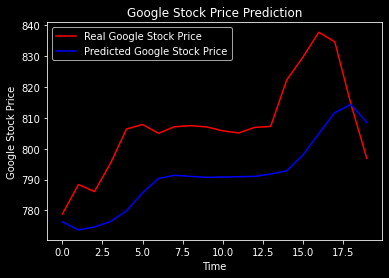

In [51]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
